<a href="https://colab.research.google.com/github/YuvrajKhade/CodeAI-x-Microsoft-ReSkill-Internship/blob/main/Project%202%3A%20%20Using%20Advanced%20excel%20and%20%20power%20bi%20analize%20whatsapp%20%20data/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass




In [ ]:
seed_value=42

#fix seed value for deterministic
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
X_train.shape, X_test.shape

170498071/170498071 [==============================] - 3s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

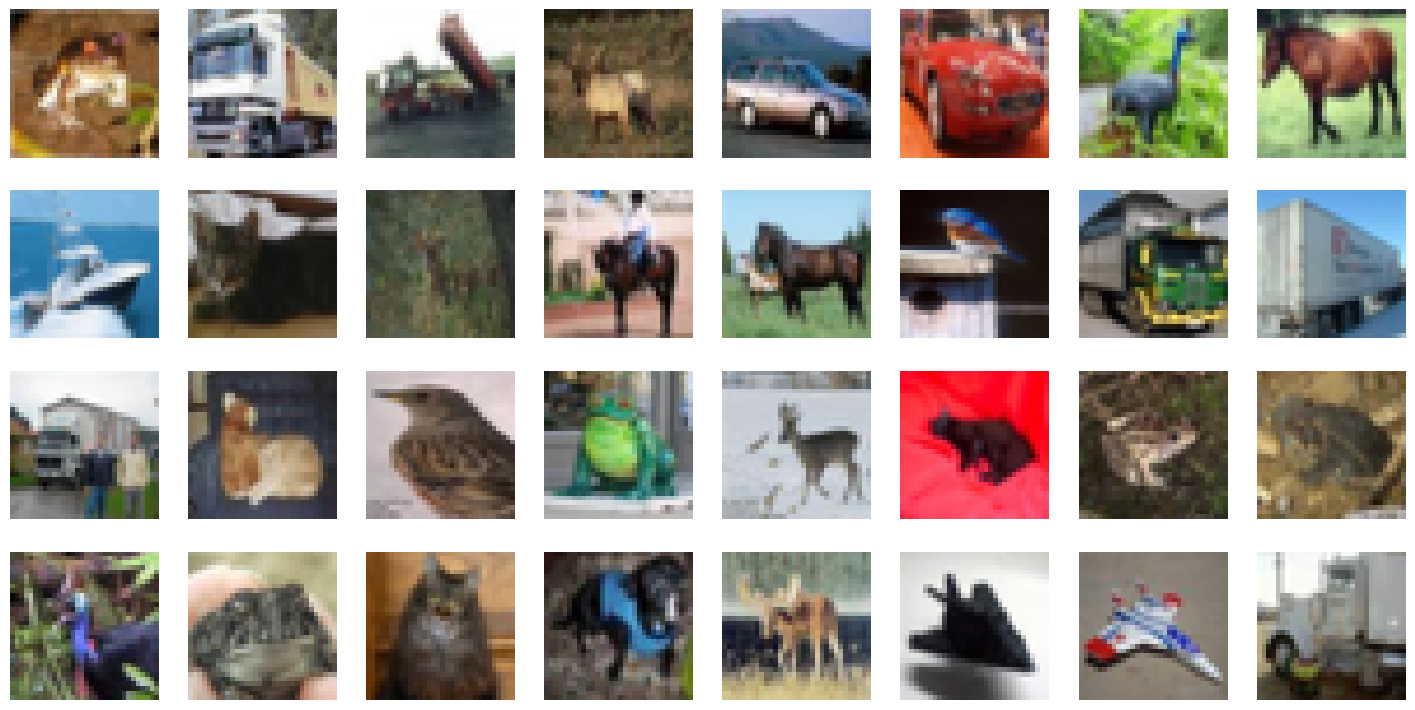

In [ ]:
plt.figure(figsize=(18,9))

num_rows=4
num_cols=8

#plot each of the image in batch and the associated ground truth table
for i in range(num_rows*num_cols):
    plt.subplot(num_rows,num_cols,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')

In [ ]:
#normlized img in 0 to 1
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

#chane the label from integer to categorical
print('original integer label for first  smaple',y_train[0])

#convert label to one hot encoding
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print('new integer label for first  smaple',y_train[0])

original integer label for first  smaple [6]
new integer label for first  smaple [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
from re import I
@dataclass(frozen=True)
class DatasetConfig:
  NUM_CLASSES: int=10
  IMG_HIEGHT: int=32
  IMG_WIDTH:  int=32
  IMG_CHANNELS: int=3

@dataclass(frozen=True)
class training_config:
  EPOCHS: int=3
  BATCH_SIZE: int=256
  LEARNING_RATE: float=0.001

In [ ]:
def cnn_model():
  model=Sequential()

  #cov block 1:32 filters, maxpool
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  #conv block 2: 64 filters, maxpool
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  #conv block 3:64 filters, maxpool
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  #flatten the convolutional features
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  return model



In [ ]:
# create the model
model=cnn_model()

model.build(input_shape=(None,32,32,3))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [ ]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=training_config.BATCH_SIZE,
                    epochs=training_config.EPOCHS,
                    verbose=1,
                    validation_split=.3)  # Changed from 3 to 0.2


Epoch 1/5
137/137 [==============================] - 238s 2s/step - loss: 1.9575 - accuracy: 0.2831 - val_loss: 1.7454 - val_accuracy: 0.3594
Epoch 2/5
137/137 [==============================] - 234s 2s/step - loss: 1.6816 - accuracy: 0.3876 - val_loss: 1.6012 - val_accuracy: 0.4222
Epoch 3/5
137/137 [==============================] - 214s 2s/step - loss: 1.4797 - accuracy: 0.4609 - val_loss: 1.3434 - val_accuracy: 0.5047
Epoch 4/5
137/137 [==============================] - 220s 2s/step - loss: 1.3284 - accuracy: 0.5229 - val_loss: 1.2298 - val_accuracy: 0.5556
Epoch 5/5
137/137 [==============================] - 213s 2s/step - loss: 1.1969 - accuracy: 0.5726 - val_loss: 1.2149 - val_accuracy: 0.5717


In [ ]:
def plot_result(metrics,title=None,ylim=None,ylabel=None,metric_name=None,color=None):
  fig, ax=plt.subplots(figsize=(15,4))

  if not(isinstance(metric_name,list)or isinstance(metric_name,tuple)):
    metric=[metrics,]
    metric_name=[metric_name,]

  for idx,metric in enumerate(metrics):
    ax.plot(metric,color=color[idx])

  plt.xlabel("Epochs")
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xlim([0,training_config.EPOCHS-1])
  plt.ylim(ylim)
  #tailor x_axis tick marks
  ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
  ax.xaxis.set_minor_locator(MultipleLocator(1))
  plt.grid(True)
  plt.legend(metric_name)
  plt.show()
  plt.close()

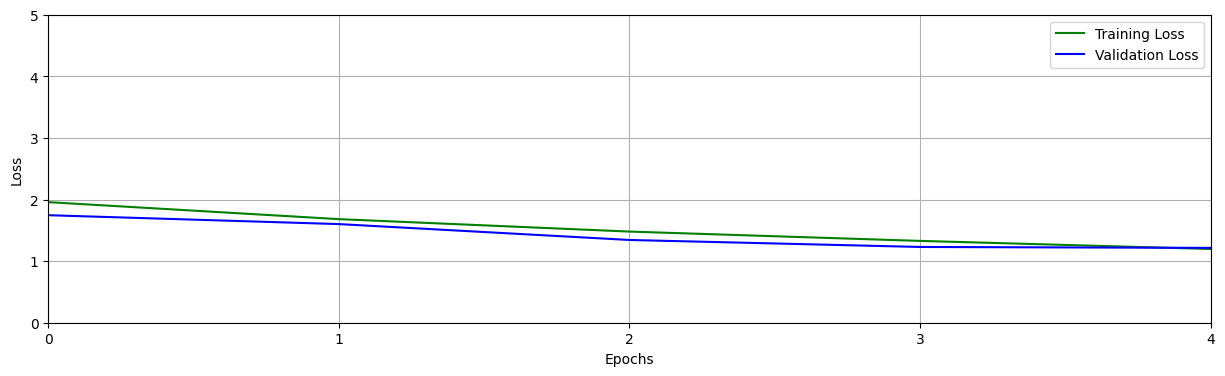

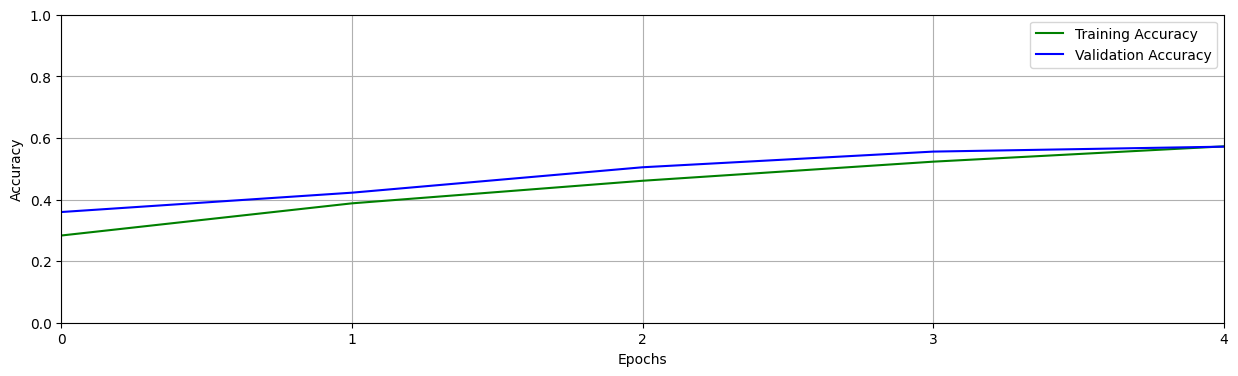

In [ ]:
#Retrieve training results
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plot_result([train_loss,val_loss],
            ylabel='Loss',
            ylim=[0.0,5.0],
            metric_name=['Training Loss','Validation Loss'],
            color=['g','b'],
            );
plot_result([train_acc,val_acc],
            ylabel='Accuracy',
            ylim=[0.0,1.0],
            metric_name=['Training Accuracy','Validation Accuracy'],
            color=['g','b'],
            );


In [ ]:
def cnn_model_dropout(input_shape=(32,32,3)):
  model=Sequential()

   #cov block 1:32 filters, maxpool
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=input_shape))
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  #conv block 2: 64 filters, maxpool
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))


  #conv block 3:64 filters, maxpool
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))


  #flatten the convolutional features
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(10,activation='softmax'))

  return model




In [ ]:
# create the model
model=cnn_model_dropout()

model.build(input_shape=(None,32,32,3))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [ ]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=training_config.BATCH_SIZE,
                    epochs=training_config.EPOCHS,
                    verbose=1,
                    validation_split=.3)

Epoch 1/3
137/137 [==============================] - 219s 2s/step - loss: 2.0874 - accuracy: 0.2381 - val_loss: 1.8647 - val_accuracy: 0.3285
Epoch 2/3
137/137 [==============================] - 237s 2s/step - loss: 1.7627 - accuracy: 0.3621 - val_loss: 1.5618 - val_accuracy: 0.4287
Epoch 3/3
137/137 [==============================] - 240s 2s/step - loss: 1.5820 - accuracy: 0.4257 - val_loss: 1.3939 - val_accuracy: 0.4870


In [ ]:
def plot_result(metrics,title=None,ylim=None,ylabel=None,metric_name=None,color=None):
  fig, ax=plt.subplots(figsize=(15,4))

  if not(isinstance(metric_name,list)or isinstance(metric_name,tuple)):
    metric=[metrics,]
    metric_name=[metric_name,]

  for idx,metric in enumerate(metrics):
    ax.plot(metric,color=color[idx])

  plt.xlabel("Epochs")
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xlim([0,training_config.EPOCHS-1])
  plt.ylim(ylim)
  #tailor x_axis tick marks
  ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
  ax.xaxis.set_minor_locator(MultipleLocator(1))
  plt.grid(True)
  plt.legend(metric_name)
  plt.show()
  plt.close()

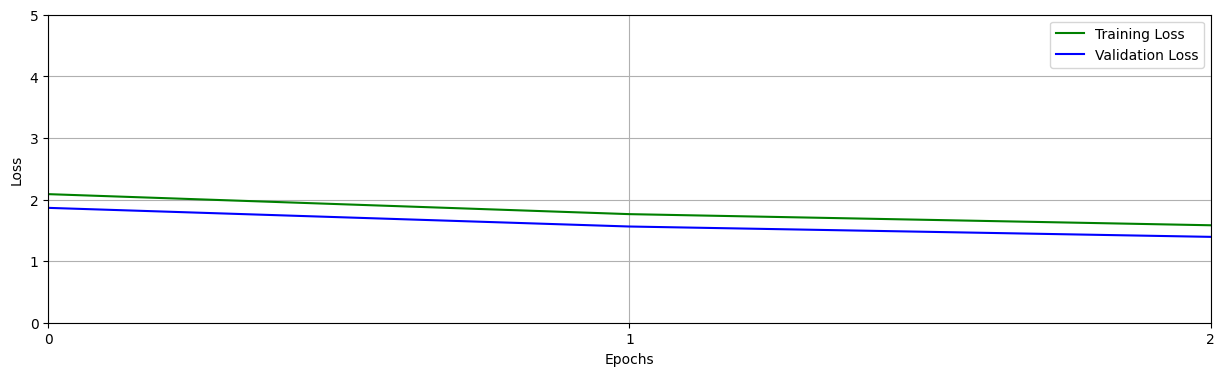

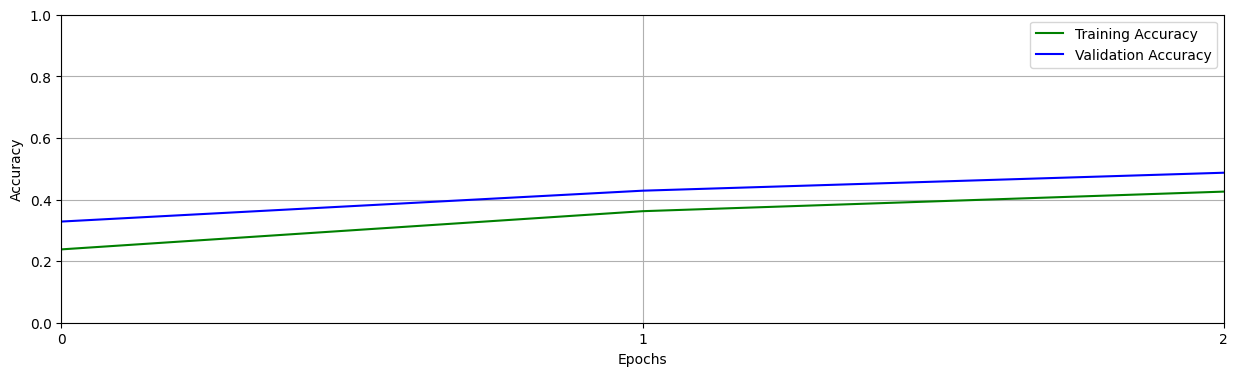

In [ ]:
#Retrieve training results
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plot_result([train_loss,val_loss],
            ylabel='Loss',
            ylim=[0.0,5.0],
            metric_name=['Training Loss','Validation Loss'],
            color=['g','b'],
            );
plot_result([train_acc,val_acc],
            ylabel='Accuracy',
            ylim=[0.0,1.0],
            metric_name=['Training Accuracy','Validation Accuracy'],
            color=['g','b'],
            );


In [ ]:
#using save method the model will be saved to the file system in the 'SaveModel'
model.save('model_dropout')


In [ ]:
from tensorflow.keras import models
reloaded_model_dropout=models.load_model('model_dropout')

In [ ]:
test_loss, test_acc=reloaded_model_dropout.evaluate(X_test,y_test)
print(f'Test accuracy:{test_acc*100:.3f}')


313/313 [==============================] - 17s 55ms/step - loss: 1.3859 - accuracy: 0.4976
Test accuracy:49.760


In [ ]:
def evaluate_model(dataset,model):
  class_names=[
              'airplane',
              'automobile',
              'bird',
              'cat',
              'deer',
              'dog',
              'frog',
              'horse',
              'ship',
              'truck'
  ]

  num_rows=3
  num_cols=6

  #retrieve a number of images from the dataset
  data_batch=dataset[0:num_rows*num_cols]

  #get predictions from model
  predictions=model.predict(data_batch)

  plt.figure(figsize=(20,8))
  num_matches=0

  #plot each of the image in batch and the associated ground truth table
  for idx in range(num_rows*num_cols):
    ax=plt.subplot(num_rows,num_cols,idx+1)
    plt.imshow(data_batch[idx])
    plt.axis('off')

    pred_idx=tf.argmax(predictions[idx]).numpy()
    truth_idx=np.nonzero(y_test[idx])

    title=str(class_names[truth_idx[0][0]])+" : "+str(class_names[pred_idx])
    title_obj=plt.title(title,fontdict={'fontsize':13})

    if pred_idx==truth_idx:
      num_matches+=1
      plt.setp(title_obj,color='g')
    else:
      plt.setp(title_obj,color='r')

    acc=num_matches/(idx+1)
  print("prediction accuracy: ",int(100*acc)/100)

  return


1/1 [==============================] - 0s 75ms/step
prediction accuracy:  0.66


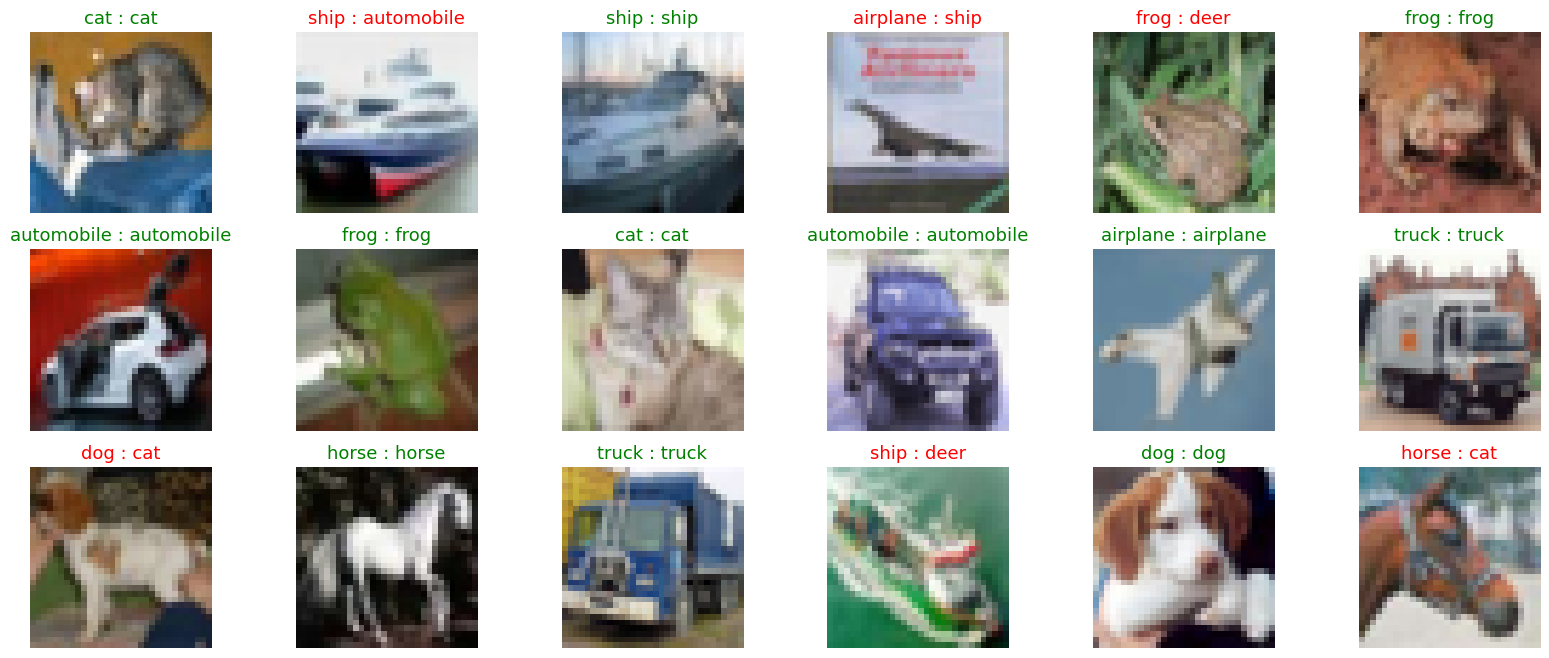

In [ ]:
evaluate_model(X_test,reloaded_model_dropout)

In [ ]:
#generate prediction for the test dataset
predictions=reloaded_model_dropout.predict(X_test)
#for each sample image in the test dataset, select the class label with highest probability
predicted_labels=[np.argmax(i) for i in predictions]

313/313 [==============================] - 16s 51ms/step


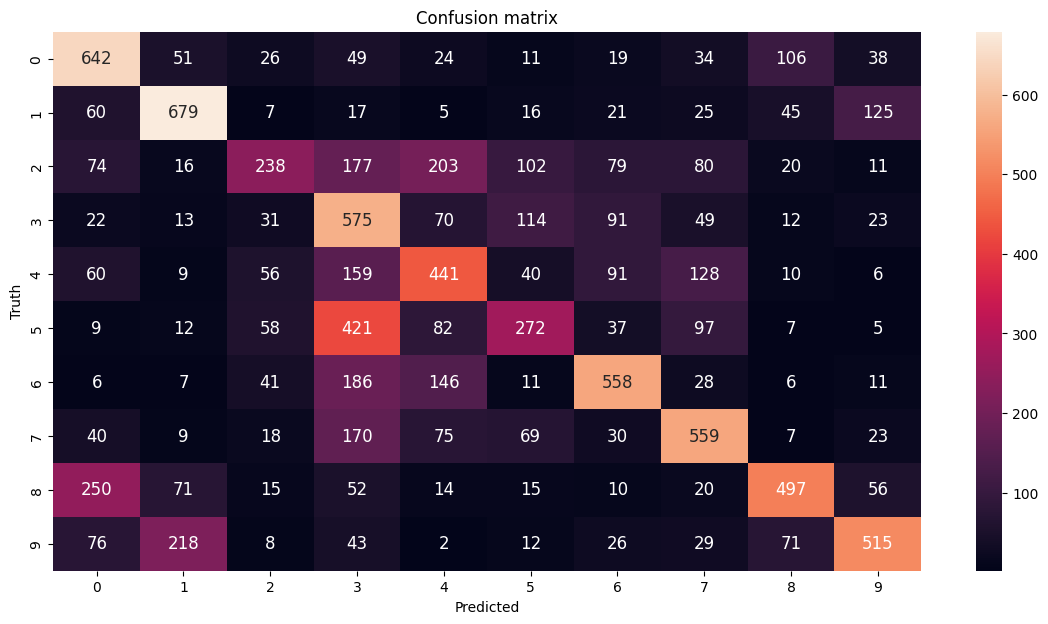

In [ ]:
#convert one hot encoded labels to integers
y_test_integers_labels=tf.argmax(y_test,axis=1)

#genrate a confusion matrix for the test dataset
cm=tf.math.confusion_matrix(labels=y_test_integers_labels,predictions=predicted_labels)

#plot the confsuion matrix as a heatmap
plt.figure(figsize=[14,7])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d',annot_kws={'size':12})
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()